✅ All files found. Proceeding with analysis...

===== Analyzing Band2 =====
File path: BAND2.tif

Metadata:
  Driver: GTiff
  Dimensions: 18457 x 16091
  Number of bands: 1
  Data type: uint16

Statistics:
  Min: 0
  Max: 191
  Mean: 67.19
  Median: 80.00
  Unique values: 135


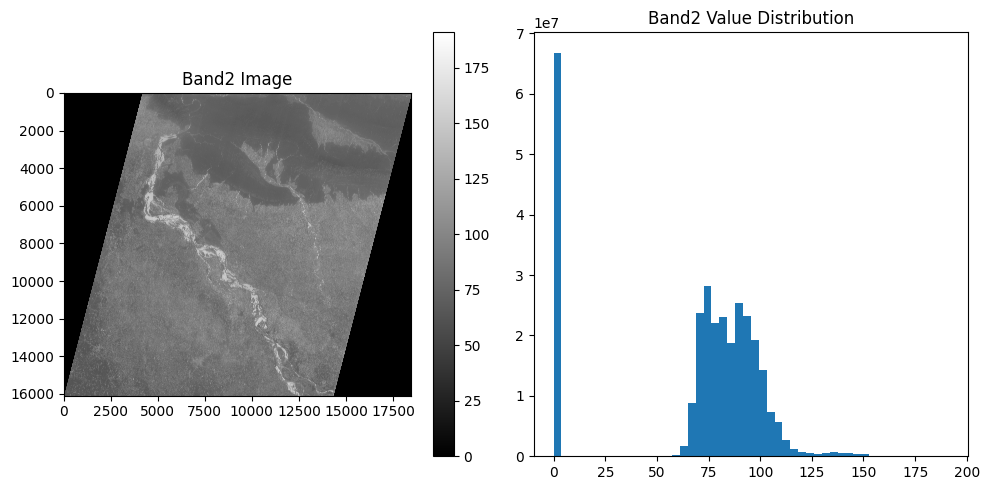



===== Analyzing Band3 =====
File path: BAND3.tif

Metadata:
  Driver: GTiff
  Dimensions: 18457 x 16091
  Number of bands: 1
  Data type: uint16

Statistics:
  Min: 0
  Max: 199
  Mean: 79.44
  Median: 98.00
  Unique values: 114


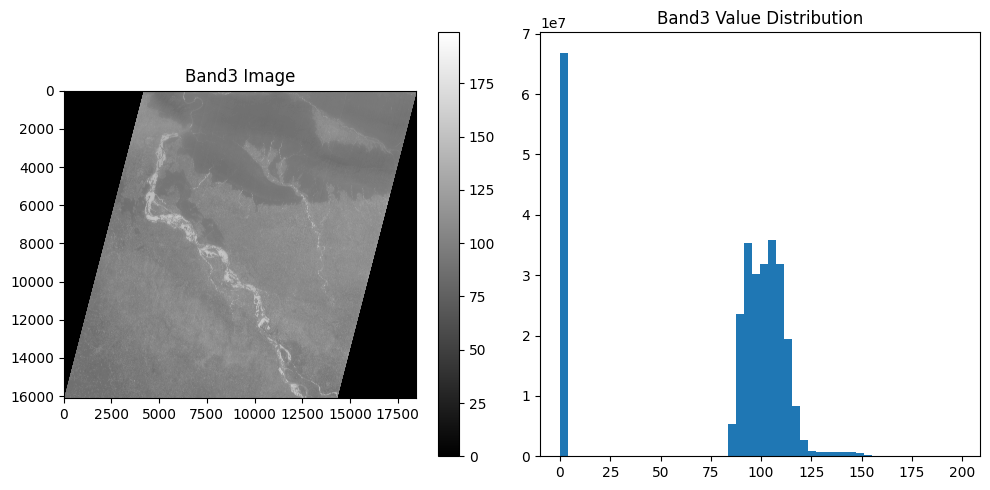



===== Analyzing Band4 =====
File path: BAND4.tif

Metadata:
  Driver: GTiff
  Dimensions: 18457 x 16091
  Number of bands: 1
  Data type: uint16

Statistics:
  Min: 0
  Max: 355
  Mean: 110.78
  Median: 132.00
  Unique values: 242


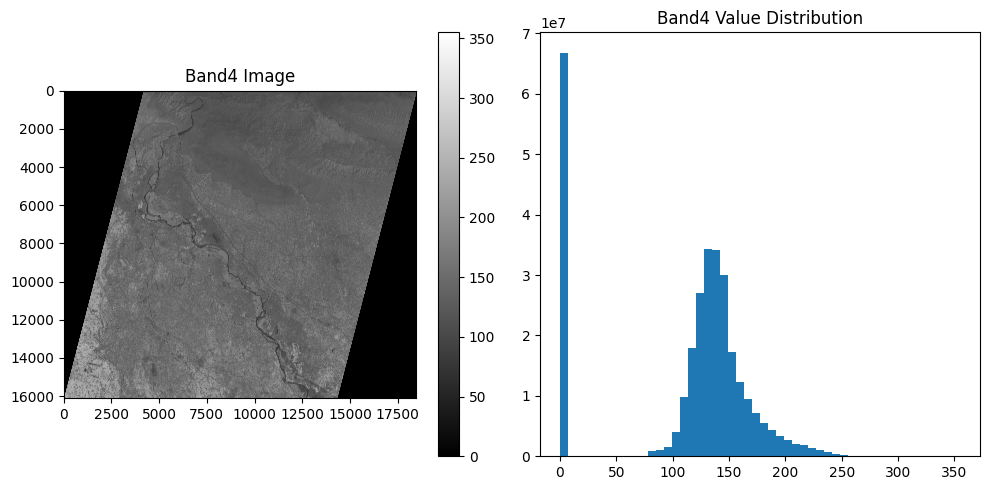

In [10]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt

def verify_liss4_bands(band2_path, band3_path, band4_path):
    """
    Enhanced verification with file existence checks and better error handling
    
    Args:
        band2_path: Path to Band 2 (Green) image
        band3_path: Path to Band 3 (Red) image  
        band4_path: Path to Band 4 (NIR) image
    """
    # First check if files exist
    band_paths = {
        'Band2': band2_path,
        'Band3': band3_path,
        'Band4': band4_path
    }
    
    # Verify all files exist
    missing_files = [name for name, path in band_paths.items() if not os.path.exists(path)]
    if missing_files:
        print("❌ Missing files:")
        for name in missing_files:
            print(f"- {name}: {band_paths[name]}")
        print("\nPlease verify:")
        print("1. The file names are correct")
        print("2. The files are in the same directory as your script")
        print("3. Or provide full absolute paths")
        return
    
    print("✅ All files found. Proceeding with analysis...\n")
    
    def analyze_band(path, name):
        """Helper function to analyze individual band"""
        print(f"===== Analyzing {name} =====")
        print(f"File path: {path}")
        
        try:
            with rasterio.open(path) as src:
                # Basic metadata
                print("\nMetadata:")
                print(f"  Driver: {src.driver}")
                print(f"  Dimensions: {src.width} x {src.height}")
                print(f"  Number of bands: {src.count}")
                print(f"  Data type: {src.dtypes[0]}")
                
                # Read data
                data = src.read(1)
                
                # Statistics
                print("\nStatistics:")
                print(f"  Min: {np.min(data)}")
                print(f"  Max: {np.max(data)}")
                print(f"  Mean: {np.mean(data):.2f}")
                print(f"  Median: {np.median(data):.2f}")
                print(f"  Unique values: {len(np.unique(data))}")
                
                # Visualization
                plt.figure(figsize=(10, 5))
                plt.subplot(1, 2, 1)
                plt.imshow(data, cmap='gray')
                plt.title(f"{name} Image")
                plt.colorbar()
                
                plt.subplot(1, 2, 2)
                plt.hist(data.flatten(), bins=50)
                plt.title(f"{name} Value Distribution")
                
                plt.tight_layout()
                plt.show()
                
        except Exception as e:
            print(f"\n❌ Error processing {name}: {str(e)}")
    
    # Analyze each band
    for name, path in band_paths.items():
        analyze_band(path, name)
        print("\n")

# Example usage - MODIFY THESE PATHS TO MATCH YOUR ACTUAL FILES
verify_liss4_bands(
    band2_path='BAND2.tif',    # Update this path
    band3_path='BAND3.tif',    # Update this path
    band4_path='BAND4.tif'     # Update this path#
    #band 2 must be intermediate and band 3 must be less and band 4 must be greater than band 2
    
    
)